# Regression with PM2.5 from last hour

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

from utils import read_data

dataset = read_data(keep_dates=False)
dataset.train_val_df.head()

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


,time_stamp,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
20,21,13.0,0.023069,0.023442,0.013750,0.101010,0.056767,0.349593,0.740066,0.344828,0.0,0.143939,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,22,15.0,0.021063,0.027444,0.041435,0.111111,0.048362,0.339837,0.756623,0.358621,0.0,0.053030,Gucheng,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,23,16.0,0.026078,0.031447,0.062198,0.111111,0.041825,0.344715,0.761589,0.355862,0.0,0.075758,Gucheng,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,24,16.0,0.026078,0.027444,0.065658,0.101010,0.040891,0.326829,0.764901,0.355862,0.0,0.083333,Gucheng,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24,25,14.0,0.016048,0.047456,0.145250,0.131212,0.023147,0.318699,0.769868,0.350345,0.0,0.106061,Gucheng,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Add previous hour PM2.5

In [2]:
def transform(df):
    df['PM2.5_PREV'] = df['PM2.5'].shift(1).apply(lambda x: x)
    df['time_stamp_PREV'] = df['time_stamp'].shift(1).apply(lambda x: x)
    df['station_PREV'] = df['station'].shift(1).apply(lambda x: x)
    df = df.dropna()
    # Invalid rows
    indexNames = df[(df['time_stamp'] != (df['time_stamp_PREV'] + 1)) | (df['station'] != df['station_PREV'])].index
    print("Droped",indexNames)
    df = df.drop(indexNames)
    
    df = df.drop(columns=[ 'time_stamp', 'time_stamp_PREV','station_PREV', 'station'])
    df = df.reset_index(drop=True)


    return df

train_val_df_timed = transform(dataset.train_val_df)
test_df_timed = transform(dataset.test_df)

train_val_df_timed.head(20)


Droped Int64Index([    31,     64,     70,     76,     80,     90,    101,    130,
               137,    157,
            ...
            357357, 357364, 357377, 357379, 357440, 357471, 357512, 357549,
            357597, 357622],
           dtype='int64', length=8011)
Droped Int64Index([   43,    88,   127,   134,   184,   254,   376,   426,   448,
              727,
            ...
            62918, 62922, 62925, 62928, 62930, 62948, 62983, 62989, 62991,
            63059],
           dtype='int64', length=1872)


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW,PM2.5_PREV
0,15.0,0.021063,0.027444,0.041435,0.111111,0.048362,0.339837,0.756623,0.358621,0.0,0.053030,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13.0
1,16.0,0.026078,0.031447,0.062198,0.111111,0.041825,0.344715,0.761589,0.355862,0.0,0.075758,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0
2,16.0,0.026078,0.027444,0.065658,0.101010,0.040891,0.326829,0.764901,0.355862,0.0,0.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0
3,14.0,0.016048,0.047456,0.145250,0.131212,0.023147,0.318699,0.769868,0.350345,0.0,0.106061,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0
4,18.0,0.037111,0.049457,0.093342,0.121212,0.034354,0.312195,0.774834,0.351724,0.0,0.075758,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
5,19.0,0.027081,0.059463,0.041435,0.101010,0.043693,0.310569,0.768212,0.350345,0.0,0.106061,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0
6,15.0,0.022066,0.039451,0.037974,0.090909,0.042759,0.304065,0.764901,0.351724,0.0,0.083333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0
7,13.0,0.014042,0.041452,0.079500,0.111111,0.034354,0.302439,0.766556,0.337931,0.0,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15.0
8,12.0,0.021063,0.051458,0.034514,0.111111,0.046495,0.302439,0.754967,0.344828,0.0,0.106061,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
9,3.0,0.007021,0.043454,0.048356,0.111111,0.047429,0.313821,0.750000,0.353103,0.0,0.068182,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0


## Linear Regression

Model 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficients: 
 [ 1.63359093e+02  1.37521632e+01  1.43328189e+01  5.19123824e+01
  2.39179337e+01 -1.27302707e+01  9.11698753e+00  2.47807721e+01
 -4.93053696e+01 -9.36888432e+00  3.45943012e-01 -8.29317498e-01
  1.21052668e+00 -1.08885080e+00 -1.05781139e+00 -6.68041027e-01
 -6.87691149e-01 -9.86205592e-01  8.68157109e-01  5.70195795e-01
  1.10648739e+00  4.92033300e-01  3.70094627e-01 -4.95593582e-03
 -4.77862864e-01  8.37298343e-01  7.26958199e-01]
Mean Absolute Error: 9.603605401654226
Mean Squared Error: 257.6272885192884
Root Mean Squared Error: 16.05077220943866
Coefficient of determination: 0.9547382565530373


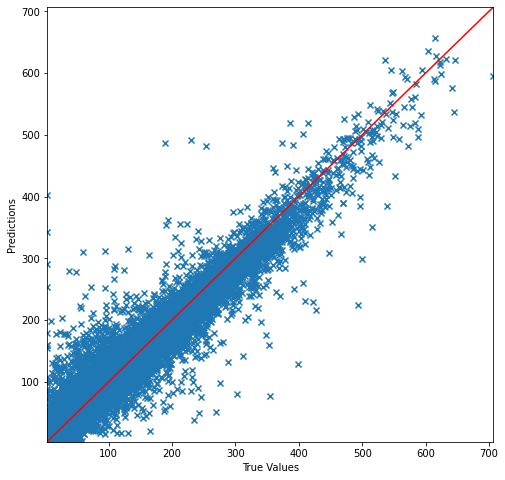

In [3]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


train_count = int(train_val_df_timed.shape[0]*0.8)

X_train = train_val_df_timed[0:train_count].drop(columns=["PM2.5"])
y_train = train_val_df_timed[0:train_count]["PM2.5"]

X_validation = train_val_df_timed[train_count:].drop(columns=["PM2.5"])
y_validation = train_val_df_timed[train_count:]["PM2.5"]


def model_fit_evaluate(reg, x_train, y_train, x_validation, y_validation):
    # Fit the mode: 
    print('Model \n', reg)
    reg.fit(x_train, y_train)
    
    # Make predictions using the validation set
    y_validation_pred = reg.predict(x_validation)
    
    # The coefficients
    if hasattr(reg, 'coef_'):
        print('Coefficients: \n', reg.coef_)
    if hasattr(reg, 'feature_importances_'):
        print('Feature Importances: \n', reg.feature_importances_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination:', metrics.r2_score(y_validation, y_validation_pred))
    
    # The line / model
    plt.figure(figsize=(8,8))
    lineStart = y_validation.min() 
    lineEnd = y_validation.max() 
    plt.scatter(y_validation, y_validation_pred, marker='x')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    
reg_linear = linear_model.LinearRegression()
model_fit_evaluate(reg_linear, X_train, y_train, X_validation, y_validation)
    
